In [1]:
# Uncomment and run the next line if plotly is not installed in your system
# !pip install plotly
# !pip install sklearn

In [2]:
# Importing reqd libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re

from datetime import date

import plotly.graph_objects as go
import plotly.express as px

### Data handling and preprocessing

In [3]:
# Setting plot config
%matplotlib inline
plt.style.use('fivethirtyeight')
plt.rcParams["figure.figsize"] = [14, 7]

In [4]:
df_raw = pd.read_csv('data.csv', parse_dates = ['date'], dayfirst=True)
df_raw.head()

date    campaign    adgroup    ad  impressions  clicks  cost  \
0 2020-08-01  campaign 1  adgroup 1  ad 1           24       6  0.08   
1 2020-08-01  campaign 1  adgroup 2  ad 1            1       0  0.00   
2 2020-08-01  campaign 1  adgroup 3  ad 1           13       4  0.04   
3 2020-08-01  campaign 1  adgroup 4  ad 1            5       4  0.08   
4 2020-08-01  campaign 1  adgroup 1  ad 2          247     126  1.29   

   conversions  revenue  
0            0     0.00  
1            0     0.00  
2            0     0.00  
3            0     0.00  
4            4   925.71

In [5]:
# df['date'] = pd.to_datetime(df['date'])
df = df_raw.copy()
df.head()

date    campaign    adgroup    ad  impressions  clicks  cost  \
0 2020-08-01  campaign 1  adgroup 1  ad 1           24       6  0.08   
1 2020-08-01  campaign 1  adgroup 2  ad 1            1       0  0.00   
2 2020-08-01  campaign 1  adgroup 3  ad 1           13       4  0.04   
3 2020-08-01  campaign 1  adgroup 4  ad 1            5       4  0.08   
4 2020-08-01  campaign 1  adgroup 1  ad 2          247     126  1.29   

   conversions  revenue  
0            0     0.00  
1            0     0.00  
2            0     0.00  
3            0     0.00  
4            4   925.71

In [6]:
df.shape

(4571, 9)

In [7]:
df.nunique()

date            212
campaign          1
adgroup           4
ad               70
impressions     571
clicks          355
cost            810
conversions      49
revenue        1223
dtype: int64

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4571 entries, 0 to 4570
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   date         4571 non-null   datetime64[ns]
 1   campaign     4571 non-null   object        
 2   adgroup      4571 non-null   object        
 3   ad           4571 non-null   object        
 4   impressions  4571 non-null   int64         
 5   clicks       4571 non-null   int64         
 6   cost         4571 non-null   float64       
 7   conversions  4571 non-null   int64         
 8   revenue      4571 non-null   float64       
dtypes: datetime64[ns](1), float64(2), int64(3), object(3)
memory usage: 321.5+ KB


There are no null values in the dataset

In [9]:
df.describe()

impressions       clicks         cost  conversions       revenue
count  4571.000000  4571.000000  4571.000000  4571.000000   4571.000000
mean     92.635747    43.340844     2.800834     1.339094    231.865340
std     198.349737   100.164913    14.361618     5.223922   1091.742763
min       1.000000     0.000000     0.000000     0.000000      0.000000
25%       6.000000     2.000000     0.040000     0.000000      0.000000
50%      16.000000     7.000000     0.210000     0.000000      0.000000
75%      84.000000    38.000000     1.350000     1.000000     92.600000
max    3239.000000  1771.000000   531.250000    94.000000  20515.410000

In [10]:
df.dtypes

date           datetime64[ns]
campaign               object
adgroup                object
ad                     object
impressions             int64
clicks                  int64
cost                  float64
conversions             int64
revenue               float64
dtype: object

Standard deviation is much greater than mean, the dataset is widely spread indicating presence of outliers. 

In [11]:
# Calculating efficiency metrics adding columns to indeicate day of month and week

def metrics(df):
    df.drop(columns=['campaign'], inplace= True)
    df['month'] = df['date'].dt.month
    df['day_of_month'] = df['date'].dt.day
    df['day_of_week'] = df['date'].dt.dayofweek
    
    df['CR'] = np.round(np.where(df['conversions'] != 0, df['conversions']/df['clicks'], 0), 3)
    df['CTR'] = np.round(np.where(df['impressions'] != 0, df['clicks']/df['impressions'], 0), 3)
    df['CPC'] = np.round(np.where(df['clicks'] != 0, df['cost']/df['clicks'], 0), 3)
    df['CPA'] = np.round(np.where(df['conversions'] != 0, df['cost']/df['conversions'], 0), 3)
    df['ROI'] = np.round(np.where(df['revenue'] != 0, df['cost']/df['revenue'], 0), 3)
    return df

df = metrics(df)

df.head()

date    adgroup    ad  impressions  clicks  cost  conversions  \
0 2020-08-01  adgroup 1  ad 1           24       6  0.08            0   
1 2020-08-01  adgroup 2  ad 1            1       0  0.00            0   
2 2020-08-01  adgroup 3  ad 1           13       4  0.04            0   
3 2020-08-01  adgroup 4  ad 1            5       4  0.08            0   
4 2020-08-01  adgroup 1  ad 2          247     126  1.29            4   

   revenue  month  day_of_month  day_of_week     CR    CTR    CPC    CPA  \
0     0.00      8             1            5  0.000  0.250  0.013  0.000   
1     0.00      8             1            5  0.000  0.000  0.000  0.000   
2     0.00      8             1            5  0.000  0.308  0.010  0.000   
3     0.00      8             1            5  0.000  0.800  0.020  0.000   
4   925.71      8             1            5  0.032  0.510  0.010  0.322   

     ROI  
0  0.000  
1  0.000  
2  0.000  
3  0.000  
4  0.001

In [12]:
df.describe()

impressions       clicks         cost  conversions       revenue  \
count  4571.000000  4571.000000  4571.000000  4571.000000   4571.000000   
mean     92.635747    43.340844     2.800834     1.339094    231.865340   
std     198.349737   100.164913    14.361618     5.223922   1091.742763   
min       1.000000     0.000000     0.000000     0.000000      0.000000   
25%       6.000000     2.000000     0.040000     0.000000      0.000000   
50%      16.000000     7.000000     0.210000     0.000000      0.000000   
75%      84.000000    38.000000     1.350000     1.000000     92.600000   
max    3239.000000  1771.000000   531.250000    94.000000  20515.410000   

             month  day_of_month  day_of_week           CR          CTR  \
count  4571.000000   4571.000000  4571.000000  4571.000000  4571.000000   
mean      7.562240     15.531175     3.034566     0.021206     0.439928   
std       4.228667      8.788299     2.019518     0.077282     0.232062   
min       1.000000      1.000000     0.000000     0.000000     0.000000   
25%       2.000000      8.000000     1.000000     0.000000     0.333000   
50%       9.000000     16.000000     3.000000     0.000000     0.451000   
75%      11.000000     23.000000     5.000000     0.016000     0.533000   
max      12.000000     31.000000     6.000000     2.000000     2.000000   

               CPC          CPA          ROI  
count  4571.000000  4571.000000  4571.000000  
mean      0.059020     0.556687     0.005174  
std       0.135017     2.011104     0.024233  
min       0.000000     0.000000     0.000000  
25%       0.011000     0.000000     0.000000  
50%       0.016000     0.000000     0.000000  
75%       0.055000     0.220000     0.002000  
max       3.810000    57.450000     0.737000

In [13]:
print('% of users visited website after seeing ad:',(df['clicks'].sum()/df['impressions'].sum())*100)
print('% of users subscribed to the product after visiting website:',(df['conversions'].sum()/df['clicks'].sum())*100)
print('% of users subscribed after seeing ad:', (df['conversions'].sum()/df['impressions'].sum())*100)

% of users visited website after seeing ad: 46.78630637779321
% of users subscribed to the product after visiting website: 3.089682046933285
% of users subscribed after seeing ad: 1.4455481085778792


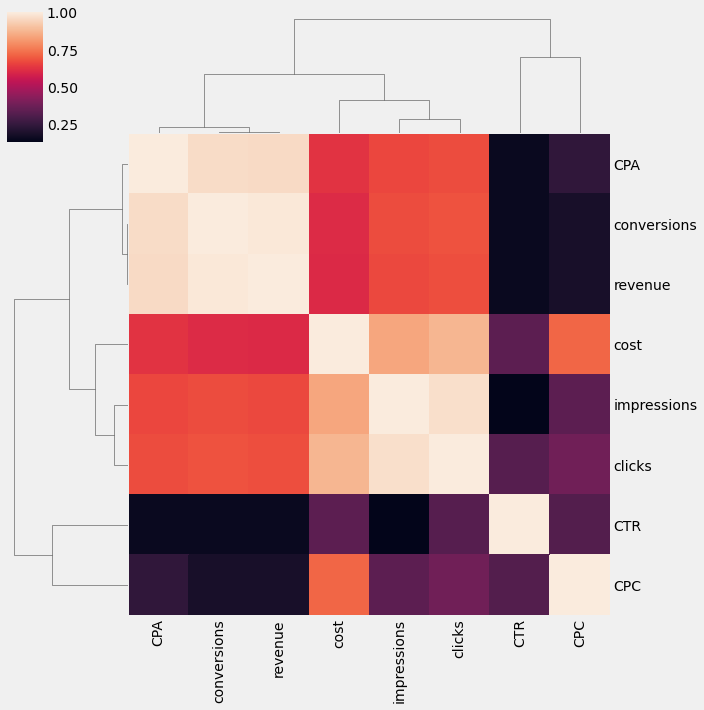

In [14]:
# Correlation plot
subset_df = df[['CTR', 'CPC', 'CPA', 'conversions', 'impressions', 'cost', 'clicks', 'revenue', 'adgroup']].copy()
p1 = sns.clustermap(subset_df.corr(method='spearman'))
p1

The heatmap and following table suggests a <b>strong positive correlation between cost, impressions, and clicks</b>

In [15]:
subset_df.corr(method='spearman')

CTR       CPC       CPA  conversions  impressions      cost  \
CTR          1.000000  0.322074  0.155981     0.153798     0.132558  0.341121   
CPC          0.322074  1.000000  0.243315     0.188837     0.341517  0.718943   
CPA          0.155981  0.243315  1.000000     0.963829     0.666399  0.630076   
conversions  0.153798  0.188837  0.963829     1.000000     0.677802  0.612924   
impressions  0.132558  0.341517  0.666399     0.677802     1.000000  0.846177   
cost         0.341121  0.718943  0.630076     0.612924     0.846177  1.000000   
clicks       0.326701  0.380163  0.676607     0.687139     0.971858  0.879657   
revenue      0.155507  0.189493  0.961619     0.992908     0.671075  0.607903   

               clicks   revenue  
CTR          0.326701  0.155507  
CPC          0.380163  0.189493  
CPA          0.676607  0.961619  
conversions  0.687139  0.992908  
impressions  0.971858  0.671075  
cost         0.879657  0.607903  
clicks       1.000000  0.680593  
revenue      0.680593  1.000000

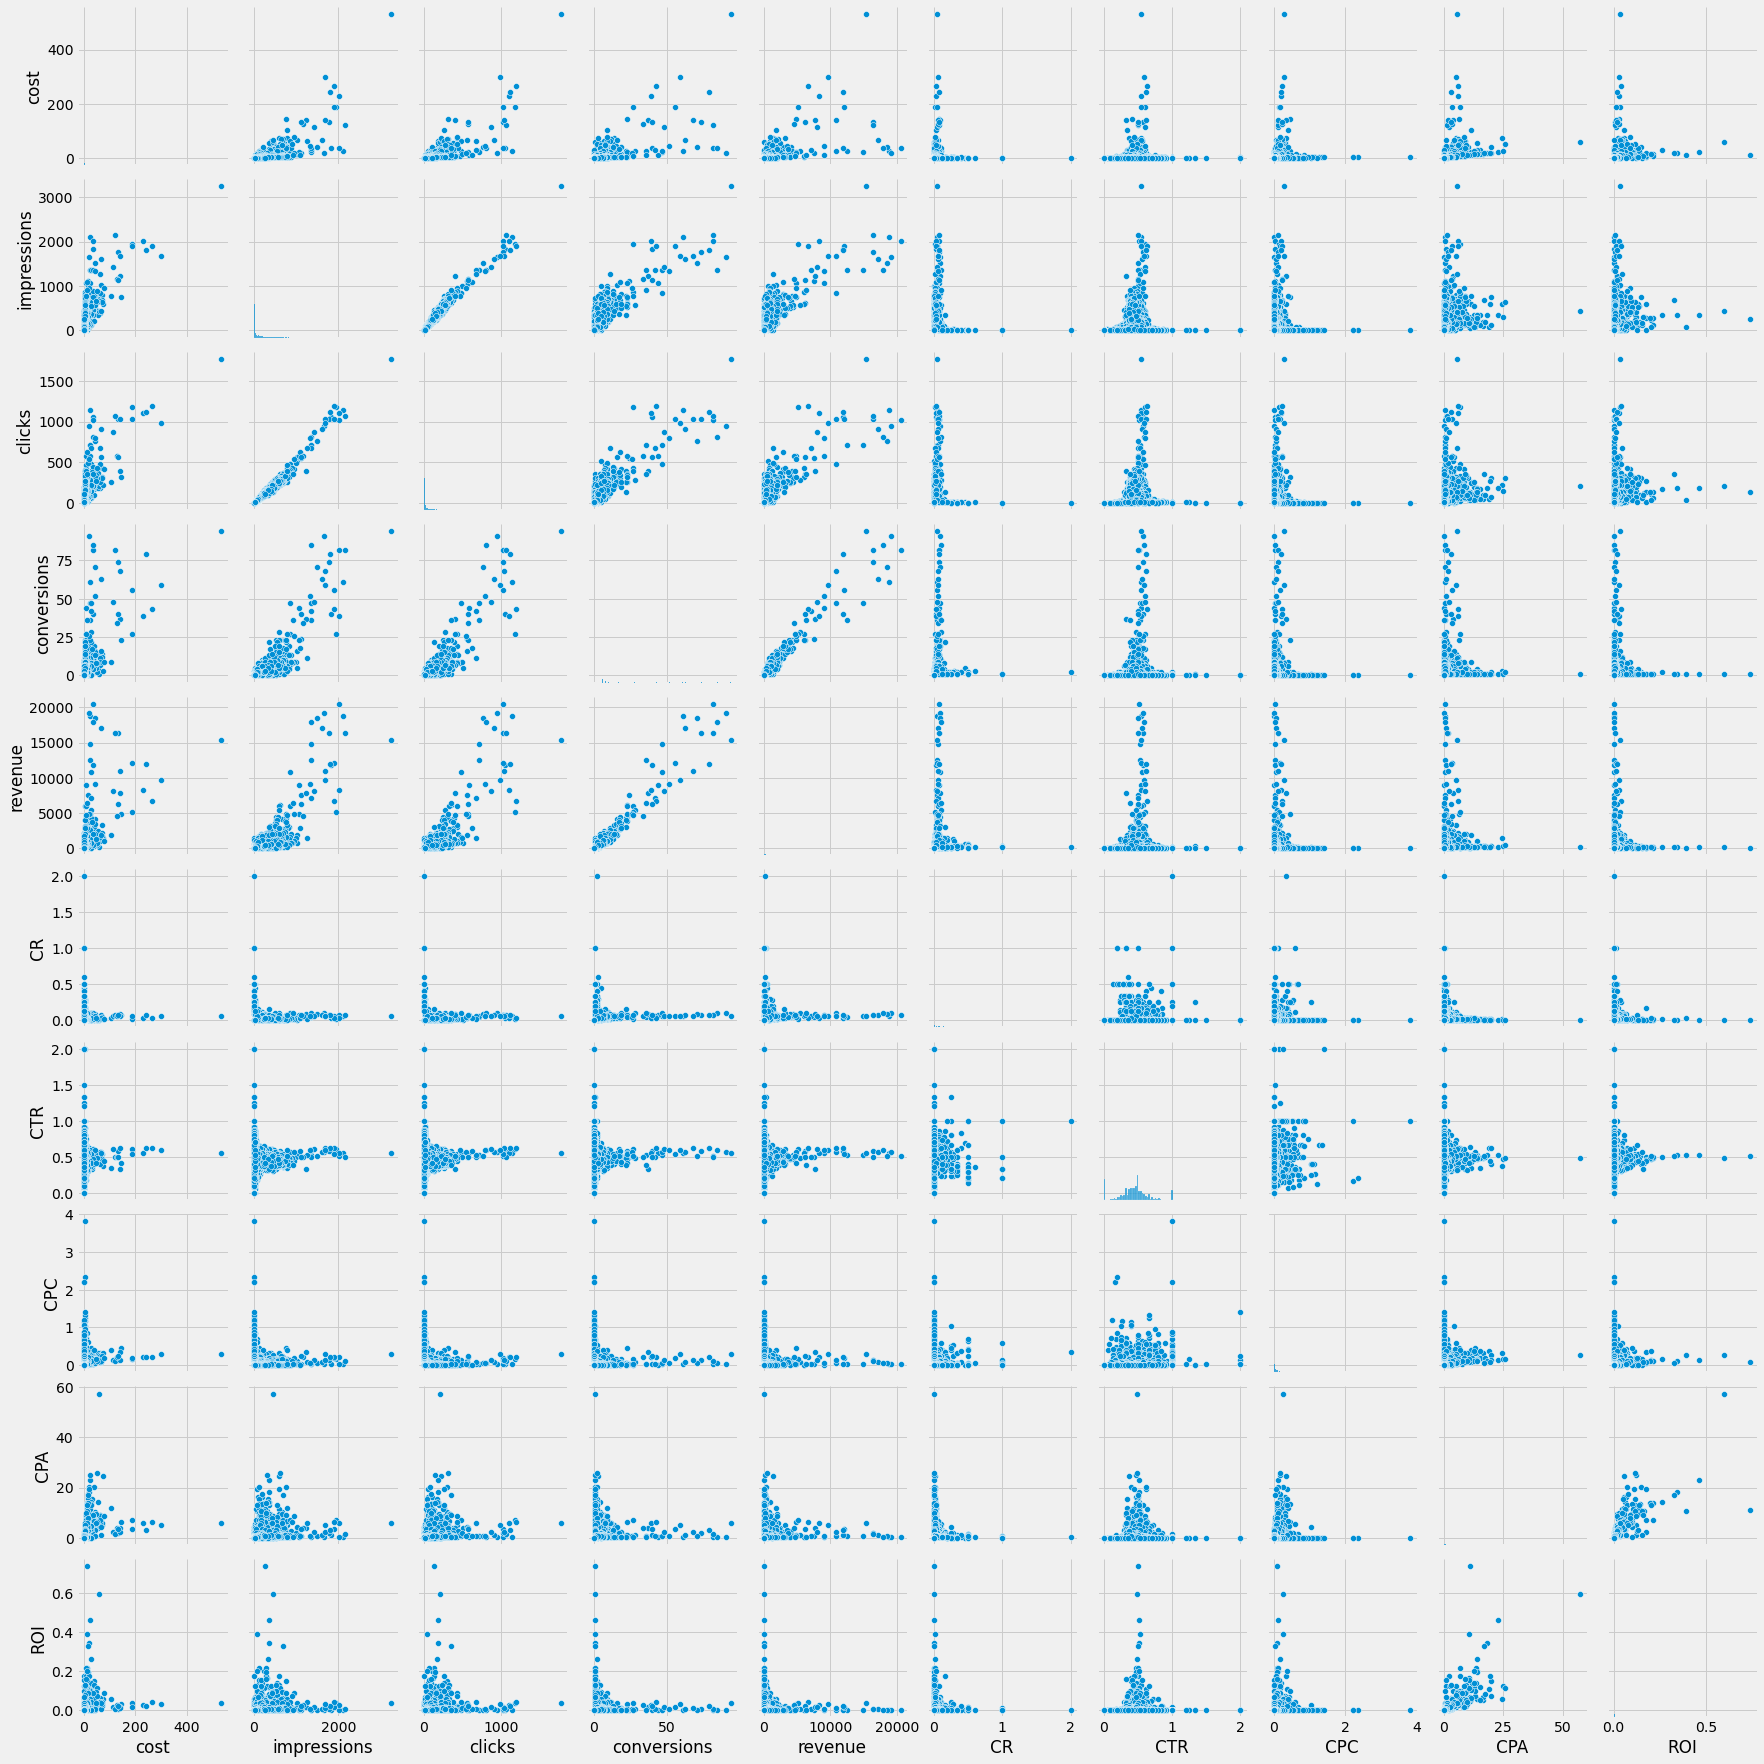

In [16]:
sns.pairplot(df[['cost', 'impressions' , 'clicks', 'conversions', 'revenue', 'CR', 'CTR', 'CPC', 'CPA', 'ROI']])

The above pairplot shows relationship between different metrics
<br>For eg) relationship between clicks and impressions follows an almost linear path

In [17]:
px.scatter(df, x='cost', y= 'impressions', color='adgroup')

Above scatter plot and the following boxplot indicates the presence of outliers in adgroups 1 & 3

Text(0.5, 0, 'Adgroup')

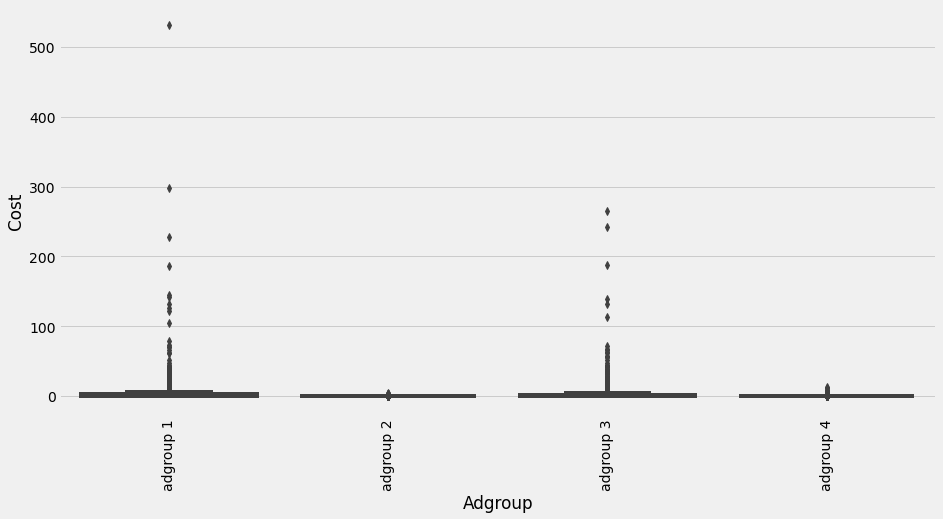

In [18]:
# px.box(df, y=df.cost)
sns.boxplot(y='cost', x='adgroup',data=df)
plt.xticks(rotation=90)
plt.ylabel('Cost')
plt.xlabel('Adgroup')


In [19]:
# Adgroup comparison

def adgroup_comp(df):

    adgroup_comp = pd.DataFrame(index= ['adgroup 1', 'adgroup 2', 'adgroup 3', 'adgroup 4'])

    for i in range(1, 5):
        adgroup_comp.loc['adgroup {}'.format(i),'impressions'] = df[df['adgroup'] == 'adgroup {}'.format(i)]['impressions'].sum()
        adgroup_comp.loc['adgroup {}'.format(i),'clicks'] = df[df['adgroup'] == 'adgroup {}'.format(i)]['clicks'].sum()
        adgroup_comp.loc['adgroup {}'.format(i),'cost'] = df[df['adgroup'] == 'adgroup {}'.format(i)]['cost'].sum()
        adgroup_comp.loc['adgroup {}'.format(i),'conversions'] = df[df['adgroup'] == 'adgroup {}'.format(i)]['conversions'].sum()
        adgroup_comp.loc['adgroup {}'.format(i),'revenue'] = df[df['adgroup'] == 'adgroup {}'.format(i)]['revenue'].sum()

    adgroup_comp['CR'] = adgroup_comp['conversions']/adgroup_comp['clicks']
    adgroup_comp['CTR'] = adgroup_comp['clicks']/adgroup_comp['impressions']
    adgroup_comp['CPC'] = adgroup_comp['cost']/adgroup_comp['clicks']
    adgroup_comp['CPA'] = adgroup_comp['cost']/adgroup_comp['conversions'] 
    adgroup_comp['ROI'] = adgroup_comp['revenue']/adgroup_comp['cost']
    
    return adgroup_comp

In [20]:
# Stats of each adgroup 
raw_df_comp = adgroup_comp(df)
raw_df_comp

impressions    clicks     cost  conversions    revenue        CR  \
adgroup 1     213844.0   92533.0  6486.02       3030.0  515630.85  0.032745   
adgroup 2       4081.0    1663.0   119.00         27.0    3750.27  0.016236   
adgroup 3     200428.0  101441.0  5873.71       2983.0  526427.64  0.029406   
adgroup 4       5085.0    2474.0   323.88         81.0   14047.71  0.032741   

                CTR       CPC       CPA        ROI  
adgroup 1  0.432713  0.070094  2.140601  79.498807  
adgroup 2  0.407498  0.071557  4.407407  31.514874  
adgroup 3  0.506122  0.057903  1.969061  89.624384  
adgroup 4  0.486529  0.130914  3.998519  43.373194

In [21]:
from plotly.subplots import make_subplots

In [22]:
# Adgroups 1-4 efficiency metrics plot

def adgroups_comp_plot(df, metrics):
    
    if metrics == 'raw':
        title = [df.columns[i].capitalize() for i in range(5)]
    elif metrics == 'efficiency': 
        title = [df.columns[i] for i in range(6,10)]
        
    fig = make_subplots(rows=2, cols=2,
                        subplot_titles= title)
    
    row = 1 
    column = 1
    if metrics == 'raw':        
        for i in range(4):
            fig.add_trace(
                go.Bar(x=df.index, y=df.iloc[:, i].values),
                row=row, col=column
            )
            column +=1
            if column == 3:
                row +=1
                column = 1
        fig.update_layout(title='Raw Metrics')
        
    elif metrics == 'efficiency':
        for i in range(6, 10):
            fig.add_trace(
                go.Bar(x=df.index, y=df.iloc[:, i].values),
                row=row, col=column
            )
            column +=1
            if column == 3:
                row +=1
                column = 1
            fig.update_layout(title='Efficiency Metrics')
    return fig.show()

In [23]:
# Function to plot daily and monthly raw & raw metrics
def df_time(df, metrics):

    count_days = df['day_of_week'].value_counts()
    count_days.index = ['Monday', 'Tuesday', 'Wednesday', 'Thursday' ,'Friday', 'Saturday', 'Sunday']
    
    df_dow = df.groupby(['day_of_week'])['cost','impressions', 'clicks', 'conversions', 'revenue'].sum()
    df_dow['CTR'] = df_dow['clicks']/df_dow['impressions']*100
    df_dow.rename(index = {0: 'Monday', 1:'Tuesday', 2:'Wednesday', 3:'Thursday', 4:'Friday', 5:'Saturday', 6:'Sunday'}, inplace = True)

    df_dom = df.groupby(['day_of_month'])['cost','impressions', 'clicks', 'conversions', 'revenue'].sum()
    df_dom['CTR'] = df_dom['clicks']/df_dom['impressions']*100

    def df_tf_efficiency(df_dow, df_dom):
                
        fig = make_subplots(
            rows=2, cols=2,
            subplot_titles=("Day of week CTR", "Day of week CR", "Day of month CTR", "Day of month CR"))

        fig.add_trace(go.Line(x=df_dow.index, y=df_dow.CTR),
                      row=1, col=1)

        fig.add_trace(go.Line(x=df_dow.index, y=df_dow.conversions/df_dow.clicks),
                      row=1, col=2)

        fig.add_trace(go.Line(x=df_dom.index, y=df_dom.CTR),
                      row=2, col=1)

        fig.add_trace(go.Line(x=df_dom.index, y=df_dom.conversions/df_dom.clicks),
                      row=2, col=2)

        fig.update_layout(title_text="CTR and CR Comparison")
        return fig
    
    def df_weekly_raw(df_dow):
        fig = make_subplots(rows=2, cols=2,
                            subplot_titles=("Impressions", "Cost", 'Clicks', 'Conversion'))
        i = range(0,7)
        fig.add_trace(go.Bar(x=df_dow.index, y=df_dow.impressions/count_days[i]),
        row=1, col=1)

        fig.add_trace(go.Bar(x=df_dow.index, y=df_dow.cost/count_days),
        row=1, col=2)

        fig.add_trace(go.Bar(x=df_dow.index, y=df_dow.clicks/count_days),
        row=2, col=1)
        fig.add_trace(go.Bar(x=df_dow.index, y=df_dow.conversions/count_days),
        row=2, col=2)

        fig.update_layout(title_text="Monday-Sunday Average Stats")
        return fig
    
    if metrics == 'raw':
        fig = df_weekly_raw(df_dow)
    elif metrics == 'efficiency':
        fig = df_tf_efficiency(df_dow, df_dom)
    
    return fig

In [24]:
adgroups_comp_plot(raw_df_comp, 'raw')

In [25]:
df_time(df, 'raw')

C:\Users\Tejas\anaconda3\lib\site-packages\ipykernel_launcher.py:7: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.

C:\Users\Tejas\anaconda3\lib\site-packages\ipykernel_launcher.py:11: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



Average impressions, clicks, conversions are highest on Thursdays while spending cost is highest on Fridays.

In [26]:
px.bar(raw_df_comp, x=raw_df_comp.index, y=round(raw_df_comp['conversions']*100/raw_df_comp['clicks'], 4),title='Conversion rate (%)')

Analysis: adgroup 1 has the highest conversion rate, adgroup 4 just behind by 0.04% but high costs associated with it as well 

In [27]:
adgroups_comp_plot(raw_df_comp, 'efficiency')

<i><b>Inferences: </b></i>


| Adgroup | Pros | Cons |
| --- | --- | --- |
| Adgroup 1 | High CTR, good ROI and highest CR | NO CONS |
| Adgroup 2 | NO PROS | Lowest ROI, CR and CTR, highest CPA |
| Adgroup 3 | Highest ROI and CTR, Lowest CPA and CPC | NO CONS |
| Adgroup 4 | High CTR and CR | High associated costs (High CPC, CPA) |



<b>Conclusions: </b>
1. It is safe to say that increasing budget for adgroups 1 and 3 seems profitable. 
2. We should allocate a small amount of the budget to adgroup 4 as well, since it has a high conversion rate. With time, there's a possibility it could become more profitable. It is strongly advised to be cautious and only invest small amounts as part of experiment since there are high costs associated with it as well.
3. Adgroup 2 is highly inefficient and unprofitable. 
 

% of users visited website after seeing ads: 46.78630637779321<br>
% of users subscribed to the product after visiting website: 3.089682046933285

In [28]:
df_time(df, 'efficiency')

C:\Users\Tejas\anaconda3\lib\site-packages\ipykernel_launcher.py:7: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.

C:\Users\Tejas\anaconda3\lib\site-packages\ipykernel_launcher.py:11: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.

C:\Users\Tejas\anaconda3\lib\site-packages\plotly\graph_objs\_deprecations.py:385: DeprecationWarning:

plotly.graph_objs.Line is deprecated.
Please replace it with one of the following more specific types
  - plotly.graph_objs.scatter.Line
  - plotly.graph_objs.layout.shape.Line
  - etc.




We can observe <b>conversion rate</b> is good from<b> Thursdays through Sundays</b> and there is a surge observed on <b>Wednesdays</b>, while<b> CTR</b> is good on<b> Wednesdays through Fridays</b> and a huge dip is observed on <b>Saturdays</b>.

## Performance after removing outliers

As mentioned earlier, the data has some outliers, most of which are in adgroups 1 & 3. Now we'll remove these outliers and compare performances once again.

In [29]:
from scipy.stats import stats

In [30]:
# Removing Outliers from data

z_scores = stats.zscore(df[['impressions', 'clicks', 'cost', 'conversions', 'revenue']])

abs_z_scores = np.abs(z_scores)
filtered_entries = (abs_z_scores < 3).all(axis=1)
df_new = pd.DataFrame(df_raw[filtered_entries])
df_new

date    campaign    adgroup     ad  impressions  clicks  cost  \
0    2020-08-01  campaign 1  adgroup 1   ad 1           24       6  0.08   
1    2020-08-01  campaign 1  adgroup 2   ad 1            1       0  0.00   
2    2020-08-01  campaign 1  adgroup 3   ad 1           13       4  0.04   
3    2020-08-01  campaign 1  adgroup 4   ad 1            5       4  0.08   
4    2020-08-01  campaign 1  adgroup 1   ad 2          247     126  1.29   
...         ...         ...        ...    ...          ...     ...   ...   
4566 2021-02-28  campaign 1  adgroup 3  ad 55           19       6  0.07   
4567 2021-02-28  campaign 1  adgroup 4  ad 55            1       0  0.00   
4568 2021-02-28  campaign 1  adgroup 3  ad 56           16       8  0.12   
4569 2021-02-28  campaign 1  adgroup 1  ad 56           37      13  0.23   
4570 2021-02-28  campaign 1  adgroup 1  ad 55           19      10  0.14   

      conversions  revenue  
0               0     0.00  
1               0     0.00  
2               0     0.00  
3               0     0.00  
4               4   925.71  
...           ...      ...  
4566            0     0.00  
4567            0     0.00  
4568            1    93.20  
4569            0     0.00  
4570            0     0.00  

[4458 rows x 9 columns]

In [31]:
df_new.dtypes

date           datetime64[ns]
campaign               object
adgroup                object
ad                     object
impressions             int64
clicks                  int64
cost                  float64
conversions             int64
revenue               float64
dtype: object

Text(0.5, 0, 'Adgroup')

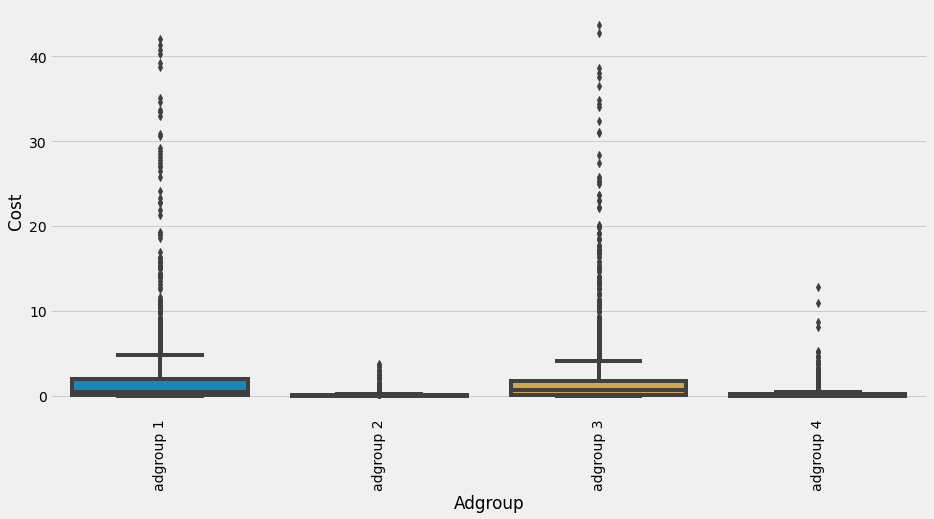

In [32]:
px.box(df_new, y=df_new.cost)
sns.boxplot(y='cost', x='adgroup',data=df_new)
plt.xticks(rotation=90)
plt.ylabel('Cost')
plt.xlabel('Adgroup')

In [33]:
metrics(df_new)

date    adgroup     ad  impressions  clicks  cost  conversions  \
0    2020-08-01  adgroup 1   ad 1           24       6  0.08            0   
1    2020-08-01  adgroup 2   ad 1            1       0  0.00            0   
2    2020-08-01  adgroup 3   ad 1           13       4  0.04            0   
3    2020-08-01  adgroup 4   ad 1            5       4  0.08            0   
4    2020-08-01  adgroup 1   ad 2          247     126  1.29            4   
...         ...        ...    ...          ...     ...   ...          ...   
4566 2021-02-28  adgroup 3  ad 55           19       6  0.07            0   
4567 2021-02-28  adgroup 4  ad 55            1       0  0.00            0   
4568 2021-02-28  adgroup 3  ad 56           16       8  0.12            1   
4569 2021-02-28  adgroup 1  ad 56           37      13  0.23            0   
4570 2021-02-28  adgroup 1  ad 55           19      10  0.14            0   

      revenue  month  day_of_month  day_of_week     CR    CTR    CPC    CPA  \
0        0.00      8             1            5  0.000  0.250  0.013  0.000   
1        0.00      8             1            5  0.000  0.000  0.000  0.000   
2        0.00      8             1            5  0.000  0.308  0.010  0.000   
3        0.00      8             1            5  0.000  0.800  0.020  0.000   
4      925.71      8             1            5  0.032  0.510  0.010  0.322   
...       ...    ...           ...          ...    ...    ...    ...    ...   
4566     0.00      2            28            6  0.000  0.316  0.012  0.000   
4567     0.00      2            28            6  0.000  0.000  0.000  0.000   
4568    93.20      2            28            6  0.125  0.500  0.015  0.120   
4569     0.00      2            28            6  0.000  0.351  0.018  0.000   
4570     0.00      2            28            6  0.000  0.526  0.014  0.000   

        ROI  
0     0.000  
1     0.000  
2     0.000  
3     0.000  
4     0.001  
...     ...  
4566  0.000  
4567  0.000  
4568  0.001  
4569  0.000  
4570  0.000  

[4458 rows x 16 columns]

Earlier the dataset had <b>4471</b> entries, now <b>4458</b> after removing outliers. 

In [34]:
df_new.describe()

impressions       clicks         cost  conversions      revenue  \
count  4458.000000  4458.000000  4458.000000  4458.000000  4458.000000   
mean     70.857111    32.332885     1.588878     0.799910   124.716422   
std     124.601653    57.042655     4.216983     1.853359   321.596463   
min       1.000000     0.000000     0.000000     0.000000     0.000000   
25%       5.000000     2.000000     0.040000     0.000000     0.000000   
50%      16.000000     7.000000     0.190000     0.000000     0.000000   
75%      70.000000    31.000000     1.210000     1.000000    69.900000   
max     685.000000   334.000000    43.690000    17.000000  3425.470000   

             month  day_of_month  day_of_week           CR          CTR  \
count  4458.000000   4458.000000  4458.000000  4458.000000  4458.000000   
mean      7.516375     15.480933     3.033423     0.020644     0.438801   
std       4.248700      8.790495     2.020204     0.078041     0.234633   
min       1.000000      1.000000     0.000000     0.000000     0.000000   
25%       2.000000      8.000000     1.000000     0.000000     0.333000   
50%       9.000000     16.000000     3.000000     0.000000     0.449000   
75%      11.000000     23.000000     5.000000     0.013000     0.533000   
max      12.000000     31.000000     6.000000     2.000000     2.000000   

               CPC          CPA          ROI  
count  4458.000000  4458.000000  4458.000000  
mean      0.057989     0.469257     0.004539  
std       0.135673     1.631622     0.021792  
min       0.000000     0.000000     0.000000  
25%       0.010250     0.000000     0.000000  
50%       0.015000     0.000000     0.000000  
75%       0.053000     0.140000     0.001000  
max       3.810000    24.980000     0.737000

In [35]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4458 entries, 0 to 4570
Data columns (total 16 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   date          4458 non-null   datetime64[ns]
 1   adgroup       4458 non-null   object        
 2   ad            4458 non-null   object        
 3   impressions   4458 non-null   int64         
 4   clicks        4458 non-null   int64         
 5   cost          4458 non-null   float64       
 6   conversions   4458 non-null   int64         
 7   revenue       4458 non-null   float64       
 8   month         4458 non-null   int64         
 9   day_of_month  4458 non-null   int64         
 10  day_of_week   4458 non-null   int64         
 11  CR            4458 non-null   float64       
 12  CTR           4458 non-null   float64       
 13  CPC           4458 non-null   float64       
 14  CPA           4458 non-null   float64       
 15  ROI           4458 non-null   float64 

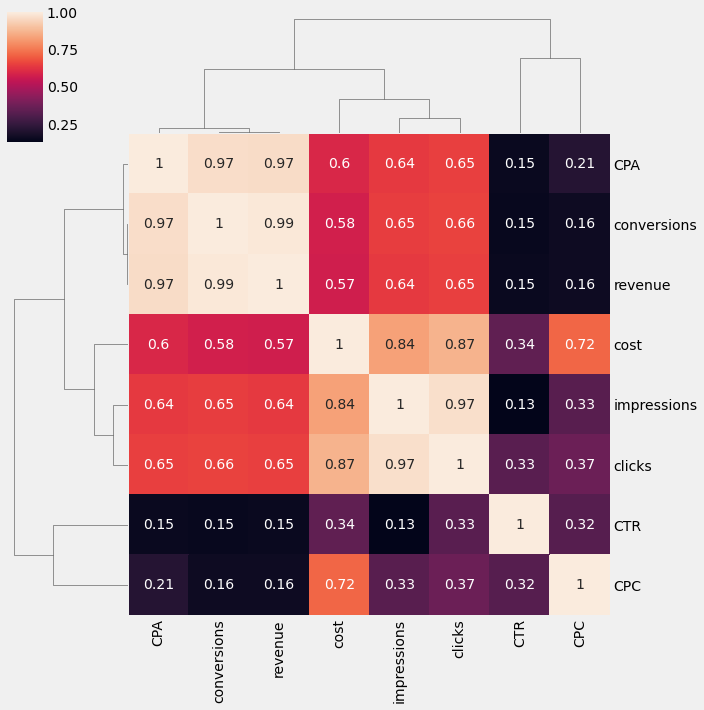

In [36]:
# Correlation plot
subset_df = df_new[['CTR', 'CPC', 'CPA', 'conversions', 'impressions', 'cost', 'clicks', 'revenue', 'adgroup']].copy()
p1 = sns.clustermap(subset_df.corr(method='spearman'), annot = True)
p1

The heatmap and following table shows a <b>strong positive correlation between cost, impressions, and clicks</b>. We can also observe that the correlation between many variables has changed after removing outliers. 

In [37]:
subset_df.corr(method='spearman')

CTR       CPC       CPA  conversions  impressions      cost  \
CTR          1.000000  0.324659  0.150477     0.146333     0.127161  0.344034   
CPC          0.324659  1.000000  0.213868     0.160063     0.327219  0.718665   
CPA          0.150477  0.213868  1.000000     0.967383     0.640927  0.599695   
conversions  0.146333  0.160063  0.967383     1.000000     0.648533  0.579065   
impressions  0.127161  0.327219  0.640927     0.648533     1.000000  0.835136   
cost         0.344034  0.718665  0.599695     0.579065     0.835136  1.000000   
clicks       0.329515  0.368108  0.651975     0.658746     0.969672  0.871194   
revenue      0.147809  0.160643  0.965094     0.992455     0.641821  0.574117   

               clicks   revenue  
CTR          0.329515  0.147809  
CPC          0.368108  0.160643  
CPA          0.651975  0.965094  
conversions  0.658746  0.992455  
impressions  0.969672  0.641821  
cost         0.871194  0.574117  
clicks       1.000000  0.652211  
revenue      0.652211  1.000000

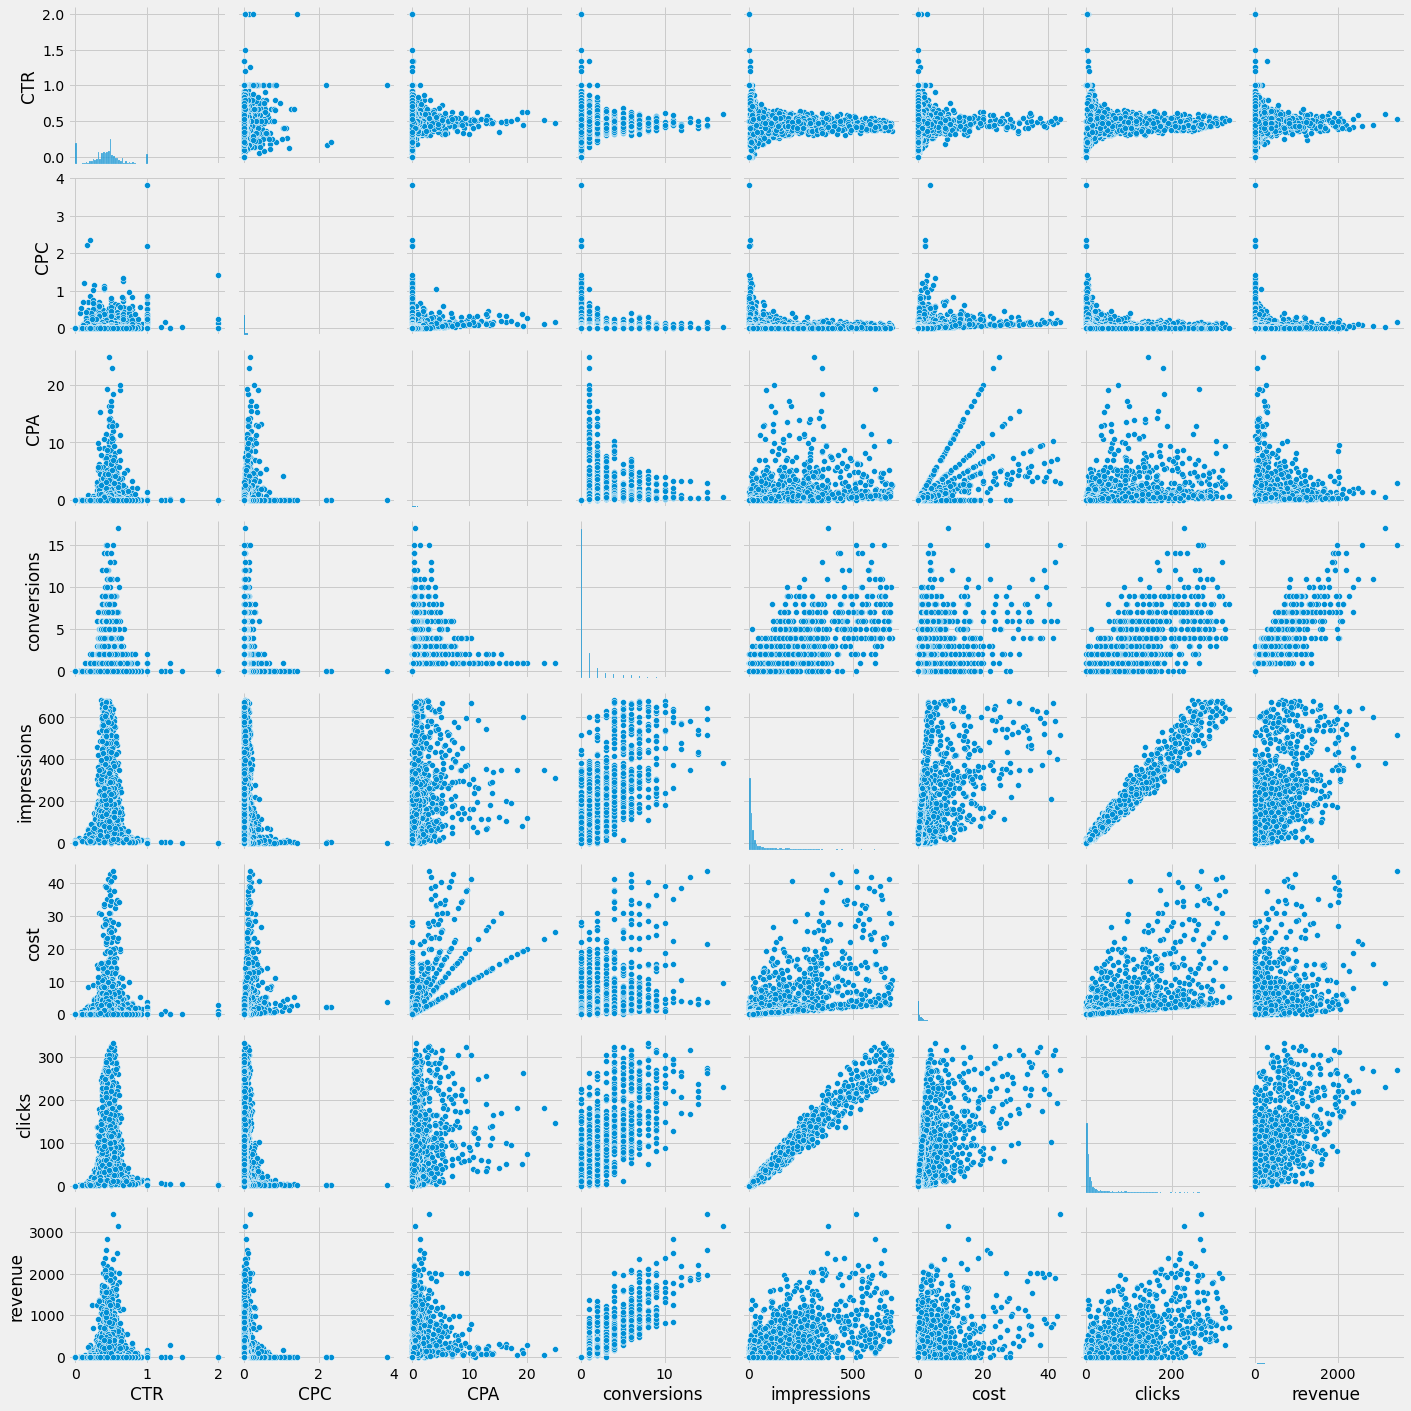

In [38]:
sns.pairplot(subset_df)

In [39]:
px.scatter(df_new, x='cost', y= 'impressions', color='adgroup')

In [40]:
new_df_comp = adgroup_comp(df_new)
new_df_comp

impressions   clicks     cost  conversions    revenue        CR  \
adgroup 1     146077.0  60605.0  2953.38       1588.0  242369.57  0.026202   
adgroup 2       4081.0   1663.0   119.00         27.0    3750.27  0.016236   
adgroup 3     160638.0  79398.0  3686.96       1870.0  295818.26  0.023552   
adgroup 4       5085.0   2474.0   323.88         81.0   14047.71  0.032741   

                CTR       CPC       CPA        ROI  
adgroup 1  0.414884  0.048732  1.859811  82.065149  
adgroup 2  0.407498  0.071557  4.407407  31.514874  
adgroup 3  0.494267  0.046436  1.971636  80.233650  
adgroup 4  0.486529  0.130914  3.998519  43.373194

In [41]:
adgroups_comp_plot(new_df_comp, 'raw')

In [42]:
df_time(df_new, 'raw')

C:\Users\Tejas\anaconda3\lib\site-packages\ipykernel_launcher.py:7: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.

C:\Users\Tejas\anaconda3\lib\site-packages\ipykernel_launcher.py:11: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



In [43]:
px.bar(new_df_comp, x=new_df_comp.index, y=round(new_df_comp['conversions']*100/new_df_comp['clicks'], 4),title='Conversion rate (%)')

In [44]:
adgroups_comp_plot(new_df_comp, 'efficiency')

In [45]:
df_time(df_new, 'efficiency')

C:\Users\Tejas\anaconda3\lib\site-packages\ipykernel_launcher.py:7: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.

C:\Users\Tejas\anaconda3\lib\site-packages\ipykernel_launcher.py:11: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.

C:\Users\Tejas\anaconda3\lib\site-packages\plotly\graph_objs\_deprecations.py:385: DeprecationWarning:

plotly.graph_objs.Line is deprecated.
Please replace it with one of the following more specific types
  - plotly.graph_objs.scatter.Line
  - plotly.graph_objs.layout.shape.Line
  - etc.




Before removing outliers:
We observed <b>conversion rate</b> is good from<b> Thursdays through Sundays</b> and there is a surge on <b>Wednesdays</b>, while<b> CTR</b> is good on<b> Wednesdays through Fridays</b> and a huge dip is observed on <b>Saturdays</b>.

After removing outliers:
We observe <b>highest conversion rate </b>on <b>Sundays</b> and a huge <b>dip on Thursdays</b>. CR steadily increases from <b>Thursday through Monday</b>. CTR steadily decreases throughout the week from Tuesday to Saturday and surges from Saturday through Monday. 

This suggests an <b>increase in spending budget on Saturdays</b>. This would result in an increase in CTR for the next 2-3 days and in turn the conversion rate as well.

## Prediction

In [46]:
from scipy.stats import stats
import statsmodels.api as sm
import math 
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

In [47]:
# Changing adgroup and ad number as follows:
# Adgroup 1,2,3,4 = [1,2,3,4]
# eg. ad 1 from adgroup 1: ad = 11
# eg. ad 32 from adgroup 2: ad = 232

def find_number(text):
    num = re.findall(r'[0-9]+',text)
    return " ".join(num)

In [48]:
df_raw['adgroup']=df_raw['adgroup'].apply(lambda x: find_number(x))
df_raw['ad'] = df_raw['adgroup'] + df_raw['ad'].apply(lambda x: find_number(x))
df_raw['adgroup'] = LabelEncoder().fit_transform(df_raw['adgroup'])
df_raw['ad'] = LabelEncoder().fit_transform(df_raw['ad'])
df_raw.head()

date    campaign  adgroup   ad  impressions  clicks  cost  \
0 2020-08-01  campaign 1        0    0           24       6  0.08   
1 2020-08-01  campaign 1        1   66            1       0  0.00   
2 2020-08-01  campaign 1        2  128           13       4  0.04   
3 2020-08-01  campaign 1        3  196            5       4  0.08   
4 2020-08-01  campaign 1        0   11          247     126  1.29   

   conversions  revenue  
0            0     0.00  
1            0     0.00  
2            0     0.00  
3            0     0.00  
4            4   925.71

In [49]:
df_new['adgroup']=df_new['adgroup'].apply(lambda x: find_number(x))
df_new['ad'] = df_new['adgroup'] + df_new['ad'].apply(lambda x: find_number(x))
df_new.head()

date adgroup  ad  impressions  clicks  cost  conversions  revenue  \
0 2020-08-01       1  11           24       6  0.08            0     0.00   
1 2020-08-01       2  21            1       0  0.00            0     0.00   
2 2020-08-01       3  31           13       4  0.04            0     0.00   
3 2020-08-01       4  41            5       4  0.08            0     0.00   
4 2020-08-01       1  12          247     126  1.29            4   925.71   

   month  day_of_month  day_of_week     CR    CTR    CPC    CPA    ROI  
0      8             1            5  0.000  0.250  0.013  0.000  0.000  
1      8             1            5  0.000  0.000  0.000  0.000  0.000  
2      8             1            5  0.000  0.308  0.010  0.000  0.000  
3      8             1            5  0.000  0.800  0.020  0.000  0.000  
4      8             1            5  0.032  0.510  0.010  0.322  0.001

In [50]:
df_new['adgroup'] = LabelEncoder().fit_transform(df_new['adgroup'])
df_new['ad'] = LabelEncoder().fit_transform(df_new['ad'])
df_new.head()

date  adgroup   ad  impressions  clicks  cost  conversions  revenue  \
0 2020-08-01        0    0           24       6  0.08            0     0.00   
1 2020-08-01        1   61            1       0  0.00            0     0.00   
2 2020-08-01        2  123           13       4  0.04            0     0.00   
3 2020-08-01        3  188            5       4  0.08            0     0.00   
4 2020-08-01        0   10          247     126  1.29            4   925.71   

   month  day_of_month  day_of_week     CR    CTR    CPC    CPA    ROI  
0      8             1            5  0.000  0.250  0.013  0.000  0.000  
1      8             1            5  0.000  0.000  0.000  0.000  0.000  
2      8             1            5  0.000  0.308  0.010  0.000  0.000  
3      8             1            5  0.000  0.800  0.020  0.000  0.000  
4      8             1            5  0.032  0.510  0.010  0.322  0.001

In [51]:
X_raw = df_raw[['adgroup', 'ad', 'cost']]
Y_raw = df_raw[['impressions', 'clicks', 'conversions', 'revenue']]
X_raw = pd.get_dummies(data=X_raw)
X_train, X_test_raw, y_train, y_test = train_test_split(X_raw, Y_raw, test_size=0.25, random_state=101)

reg1 = DecisionTreeRegressor()
reg1.fit(X_raw, Y_raw)
preds1 = reg1.predict(X_test_raw)
rmse1 = math.sqrt(mean_squared_error(y_test, preds1))

print('R-squared for Model_1 (using original dataset) =',r2_score(y_test, preds1))
print('RMSE =', rmse1)

R-squared for Model_1 (using original dataset) = 0.9922641259640295
RMSE = 31.14416344983445


In [52]:
X_new = df_new[['adgroup','ad', 'cost']]
Y_new = df_new[['impressions', 'clicks', 'conversions', 'revenue']]
X_new = pd.get_dummies(data=X_new)
X_train, X_test_new, y_train, y_test = train_test_split(X_new, Y_new, test_size=0.25, random_state=101)

reg2 = DecisionTreeRegressor()
reg2.fit(X_new, Y_new)
preds2 = reg2.predict(X_test_new)

rmse2 = math.sqrt(mean_squared_error(y_test, preds2))
print('R-squared for Model_2 (dataset with removed outliers) =',r2_score(y_test, preds2))
print('RMSE =', rmse2)

R-squared for Model_2 (dataset with removed outliers) = 0.9752326397198998
RMSE = 30.93928044072181


<b>R-Squared of our model is much higher for original dataset. RMSE is approximately equal for both models (difference ~0.1). Thus, it is better to use 1st model (reg1) for predicting metrics. </b>

In [53]:
df1 = pd.read_csv('predict.csv')

df1['adgroup']=df1['adgroup'].apply(lambda x: find_number(x))
df1['ad'] = df1['adgroup'] + df1['ad'].apply(lambda x: find_number(x))
df1['adgroup'] = LabelEncoder().fit_transform(df1['adgroup'])
df1['ad'] = LabelEncoder().fit_transform(df1['ad'])

df1.head()

index        date    campaign  adgroup  ad  cost
0      0  01-03-2021  campaign 1        0   0  0.58
1      1  01-03-2021  campaign 1        2  23  0.17
2      2  01-03-2021  campaign 1        3  37  0.05
3      3  01-03-2021  campaign 1        1  12  0.01
4      4  01-03-2021  campaign 1        1  13  0.01

In [54]:
X = df1[['adgroup','ad', 'cost']]
X = pd.get_dummies(data=X)

preds = reg1.predict(X)

In [56]:
preds

array([[ 15.  ,   6.  ,   0.  ,   0.  ],
       [ 27.5 ,  10.  ,   0.5 , 148.92],
       [ 17.  ,   5.  ,   0.  ,   0.  ],
       ...,
       [ 20.25,   8.5 ,   0.  ,   0.  ],
       [ 16.  ,   4.  ,   0.  ,   0.  ],
       [ 98.  ,  31.  ,   1.  , 237.96]])

In [57]:
preds_df = pd.DataFrame(preds, columns=['impressions', 'clicks', 'conversions', 'revenue'])
preds_df['impressions'] = preds_df['impressions'].round().astype('int64')
preds_df['clicks'] = preds_df['clicks'].round().astype('int64')
preds_df['conversions'] = preds_df['conversions'].round().astype('int64')
preds_df['revenue'] = preds_df['revenue'].round().astype('int64')

preds_df

impressions  clicks  conversions  revenue
0             15       6            0        0
1             28      10            0      149
2             17       5            0        0
3              2       1            0        0
4              2       1            0        0
..           ...     ...          ...      ...
313            5       2            0        0
314            2       1            0        0
315           20       8            0        0
316           16       4            0        0
317           98      31            1      238

[318 rows x 4 columns]

In [58]:
preds_df.to_csv('predictions.csv')